## Train Models on the Balanced Data

### Load the Balanced Data

In [36]:
import pandas as pd

In [37]:
df_train = pd.read_csv('fraudTrainBalanced.csv')

In [38]:
len(df_train)

1296675

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gender         1296675 non-null  int64  
 1   is_fraud       1296675 non-null  int64  
 2   age_group      1296675 non-null  int64  
 3   price_range    1296675 non-null  int64  
 4   distance       1296675 non-null  float64
 5   category_code  1296675 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 59.4 MB


### Split the X and Y Axis

In [40]:
x = df_train.drop('is_fraud', axis=1)

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gender         1296675 non-null  int64  
 1   age_group      1296675 non-null  int64  
 2   price_range    1296675 non-null  int64  
 3   distance       1296675 non-null  float64
 4   category_code  1296675 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 49.5 MB


In [42]:
import numpy as np
for row in df_train.itertuples():
    if np.isnan(row.gender):
        print('gender is nan=', row.gender)
    elif np.isnan(row.age_group):
        print('age_group is nan=', row.age_group)
    elif np.isnan(row.price_range):
        print('price_range is nan=', row.price_range)
    elif np.isnan(row.distance):
        print('distance is nan=', row.distance)
    elif np.isnan(row.category_code):
        print('category_code is nan=', row.category_code)
    elif np.isnan(row.is_fraud):
        print('is_fraud is nan=', row.is_fraud)

In [43]:
y = df_train[['is_fraud']]

In [44]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   is_fraud  1296675 non-null  int64
dtypes: int64(1)
memory usage: 9.9 MB


### Split Training and Test Set

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4)

### Train on Model - DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

In [49]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [50]:
y_predict = model_tree.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test, y_predict)

In [53]:
cm

array([[154521,      0],
       [   929, 103885]], dtype=int64)

In [54]:
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))

In [55]:
accuracy

0.9964177608113058

In [56]:
import joblib

In [57]:
joblib.dump(model_tree, 'group4_prj_cc_fraud_model_cart')

['group4_prj_cc_fraud_model_cart']

### Train on Model - RandomForestClassifier

In [58]:
from sklearn import ensemble

In [59]:
model_rf = ensemble.RandomForestClassifier(random_state=4, max_depth=4)

In [60]:
model_rf.fit(x_train, y_train)

C:\Users\gopit\AppData\Local\Temp/ipykernel_9252/1462693802.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, random_state=4)

In [61]:
y_predict = model_rf.predict(x_test)

In [62]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[154521      0]
 [   929 103885]]
0.9964177608113058


In [63]:
joblib.dump(model_rf, 'group4_prj_cc_fraud_model_rf')

['group4_prj_cc_fraud_model_rf']

### Train on Model - GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
model_gb = GradientBoostingClassifier(random_state=4, max_depth=4)

In [66]:
model_gb.fit(x_train, y_train)

C:\Users\gopit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(max_depth=4, random_state=4)

In [69]:
y_predict = model_gb.predict(x_test)

In [70]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[154430     91]
 [   838 103976]]
0.9964177608113058


In [71]:
joblib.dump(model_gb, 'group4_prj_cc_fraud_model_gb')

['group4_prj_cc_fraud_model_gb']

### Train on Model - LogisticRegression

In [72]:
from sklearn import linear_model

In [73]:
model_lr = linear_model.LogisticRegression(random_state=4)

In [74]:
model_lr.fit(x_train, y_train)

C:\Users\gopit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=4)

In [75]:
y_predict = model_lr.predict(x_test)

In [76]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[154521      0]
 [   929 103885]]
0.9964177608113058


In [77]:
joblib.dump(model_lr, 'group4_prj_cc_fraud_model_lr')

['group4_prj_cc_fraud_model_lr']

### Plot the Decision Tree Model

In [78]:
from sklearn.tree import export_text
feature_names = list(x.columns)
model_tree_text = export_text(model_tree, feature_names=feature_names)
print(model_tree_text)

|--- distance <= 53.23
|   |--- price_range <= 2.50
|   |   |--- category_code <= 1.50
|   |   |   |--- category_code <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- category_code >  0.50
|   |   |   |   |--- class: 0
|   |   |--- category_code >  1.50
|   |   |   |--- price_range <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- price_range >  0.50
|   |   |   |   |--- class: 0
|   |--- price_range >  2.50
|   |   |--- category_code <= 7.50
|   |   |   |--- gender <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- gender >  0.50
|   |   |   |   |--- class: 0
|   |   |--- category_code >  7.50
|   |   |   |--- class: 0
|--- distance >  53.23
|   |--- class: 1



In [79]:
from sklearn import tree

[Text(218.90769230769232, 195.696, 'X[3] <= 53.23\ngini = 0.481\nsamples = 1037340\nvalue = [618961, 418379]'),
 Text(193.15384615384616, 152.208, 'X[2] <= 2.5\ngini = 0.011\nsamples = 622555\nvalue = [618961, 3594]'),
 Text(103.01538461538462, 108.72, 'X[4] <= 1.5\ngini = 0.006\nsamples = 615079\nvalue = [613226, 1853]'),
 Text(51.50769230769231, 65.232, 'X[4] <= 0.5\ngini = 0.019\nsamples = 88814\nvalue = [87960, 854]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 29372\nvalue = [29372, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.028\nsamples = 59442\nvalue = [58588, 854]'),
 Text(154.52307692307693, 65.232, 'X[2] <= 0.5\ngini = 0.004\nsamples = 526265\nvalue = [525266, 999]'),
 Text(128.76923076923077, 21.744, 'gini = 0.006\nsamples = 222213\nvalue = [221489, 724]'),
 Text(180.27692307692308, 21.744, 'gini = 0.002\nsamples = 304052\nvalue = [303777, 275]'),
 Text(283.2923076923077, 108.72, 'X[4] <= 7.5\ngini = 0.357\nsamples = 7476\nvalue = [5735, 1741]'),
 Text(25

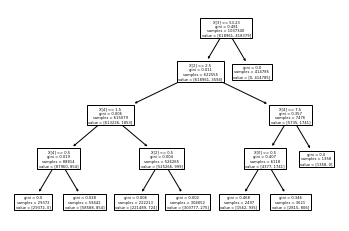

In [80]:
tree.plot_tree(model_tree)